# Data Analysis

## Import required libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

%matplotlib inline

In [2]:
# Setting up default font size values for chart's elements
# We might change the font size manually for some charts if required
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

## Read File and Perfrom basic data profiling

In [3]:
# Read CSV file
df = pd.read_csv('bestsellers with categories.csv')

In [4]:
# Check the first 5 rows
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
# Show Column names
print('Column Names:', list(df.columns))

# Find the shape of data
shape = df.shape
print('Rows: ' + str(shape[0]) + '\nCols: ' + str(shape[1]))

Column Names: ['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']
Rows: 550
Cols: 7


In [6]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
# Some statistical information about dataset
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
# Counting for null
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [9]:
# Counting Number of unique values in each column
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

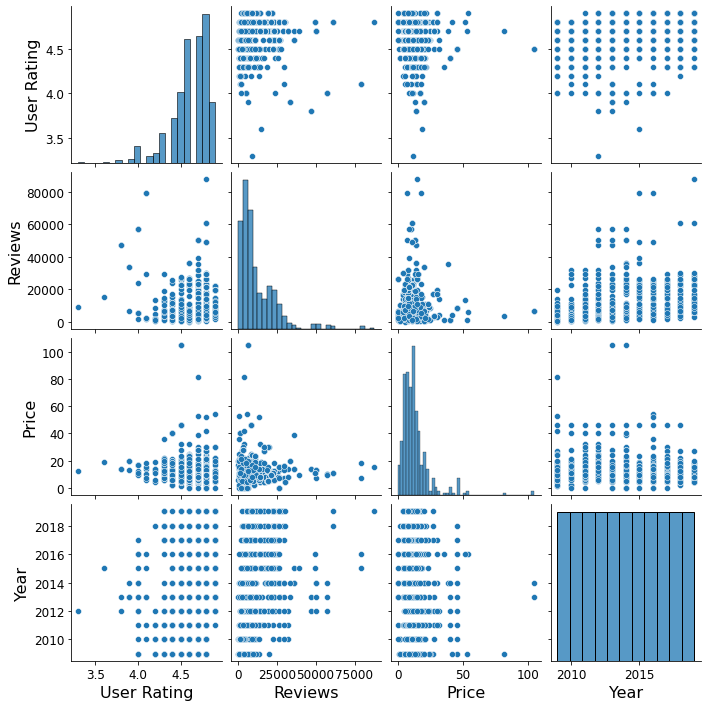

In [10]:
# Pairwise plot for numerical columns
sns.pairplot(df)

## Analysis for Books

### Finding out how many times each book became the best seller

In [11]:
book_gs = df.groupby('Name')['Year'].count()
book_gs.sort_values(ascending=False, inplace=True)
book_gs

Name
Publication Manual of the American Psychological Association, 6th Edition                       10
StrengthsFinder 2.0                                                                              9
Oh, the Places You'll Go!                                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                     7
The Very Hungry Caterpillar                                                                      7
                                                                                                ..
Sycamore Row (Jake Brigance)                                                                     1
The 17 Day Diet: A Doctor's Plan Designed for Rapid Results                                      1
The 4 Hour Body: An Uncommon Guide to Rapid Fat Loss, Incredible Sex and Becoming Superhuman     1
The 5000 Year Leap                                                                               1
10-Da

There are some books which became best seller multiple years. Let's find out more about this book

### Focusing on books that the became best seller more than once

In [12]:
# Filtering out for books that became best seller more than once
book_g1 = book_gs[book_gs > 1]
print('Total number of books listed more than once as best seller between 2009-2019 was', len(book_g1))
print('And')
print('The book that listed for most number of year was', book_gs.index[0], 
      'with listed as being top seller', book_gs.values[0], 'times.')

Total number of books listed more than once as best seller between 2009-2019 was 96
And
The book that listed for most number of year was Publication Manual of the American Psychological Association, 6th Edition with listed as being top seller 10 times.


## Adding New Column in the dataframe to show number of years listed as best seller

In [13]:
# Adding column using apply and lambda function
df['Number_Years'] = df.apply(lambda x: book_gs[x['Name']], axis=1)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Number_Years
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1


## Creating another Dataframe dropping duplicate record for books, keeping first record only

In [14]:
df_unique = df.drop_duplicates(subset=['Name']).copy()
print('Total Rows (Original):', df.shape[0])
print('Total Rows (After dropping duplicates):', df_unique.shape[0])

Total Rows (Original): 550
Total Rows (After dropping duplicates): 351


### Note
Going Forward we will use either df or df_unique based on the analysis

## Correlation

In [15]:
# Finding correlation among the columns original data
corr = df.drop(columns=['Number_Years']).corr()
corr.style.background_gradient(cmap='Blues').set_precision(3)

,User Rating,Reviews,Price,Year
User Rating,1.000,-0.002,-0.133,0.242
Reviews,-0.002,1.000,-0.109,0.264
Price,-0.133,-0.109,1.000,-0.154
Year,0.242,0.264,-0.154,1.000


### Alternative way to generate correlation

### Note
#### The best thing about python is there are many ways to do the same thing especially for generating charts. I will use different approach/packages for creating visualization based on charts. 
#### I am using matplotlib, seaborn and pandas.plot() in this project as I am only creating static charts. But there are popular packages available like plotly and bokeh for creating interactive visualization.  

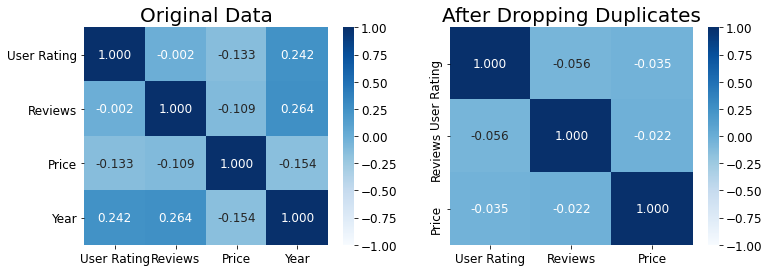

In [16]:
# Alternative way to create a correlation plot using seaborn
# Original data and unique books data used
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='Blues', annot=True, fmt='.3f', ax=ax1)
ax1.set_title('Original Data')
sns.heatmap(df_unique.drop(columns=['Year', 'Number_Years']).corr(), vmin=-1, vmax=1, cmap='Blues', annot=True, fmt='.3f', ax=ax2)
ax2.set_title('After Dropping Duplicates')
plt.show()

There is a slight change in correaltion after excluding duplicates, however, the correlation is between each variables. 

## Genre Analysis

### Finding out the proportion of best selling books by Genre

In [17]:
# Best-selling book by Genre (for all years)
# Original data used
genre_count = df['Genre'].value_counts()
genre_count

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

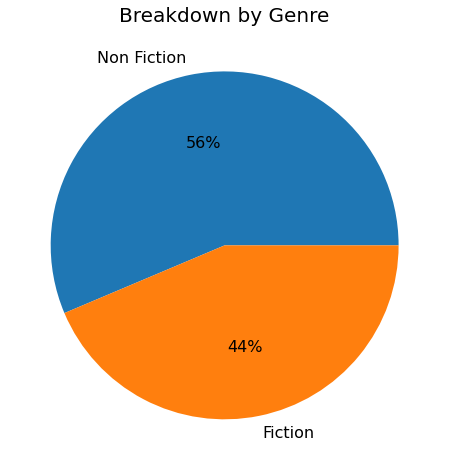

In [18]:
# Create pie chart for genre
plt.figure(figsize=(8, 8))
plt.pie(genre_count, labels=genre_count.index, autopct='%1.0f%%', 
       textprops={'fontsize': 16})
plt.title('Breakdown by Genre')
plt.show()

### Finding the distribution of rating, total reviews and price for each Genre

/Users/pkhatri/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


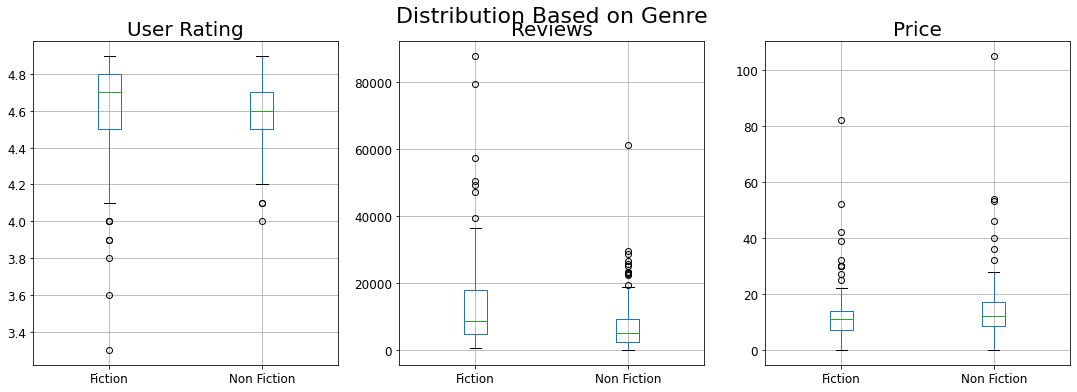

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
# Unique books dataframe used as including same book twice for rating, reviews and price would create a bias
df_unique.boxplot(by='Genre', column=['User Rating', 'Reviews', 'Price'], ax=axes)
for i in axes:
    i.set_title(i.get_title())
    i.set_xlabel('')
fig.suptitle('Distribution Based on Genre')
plt.show()

## Analysis of Author

### Creating dataframe containing author's summary

In [20]:
# Calculating total books, total reviews and average book price for each author
# Unique books dataframe used
author = df_unique.groupby('Author').agg(Total_Books=pd.NamedAgg(column='Name', aggfunc='count'), 
                                 Total_Reviews=pd.NamedAgg(column='Reviews', aggfunc='sum'), 
                                 Avg_Book_Price=pd.NamedAgg(column='Price', aggfunc='mean')).reset_index()
author.sort_values(by=['Total_Books', 'Total_Reviews'], ascending=False, inplace=True, ignore_index=True)
print('Showing top five records based on highest number of books as best sellers')
author.head()

Showing top five records based on highest number of books as best sellers


,Author,Total_Books,Total_Reviews,Avg_Book_Price
0,Jeff Kinney,12,67482,9.250000
1,Rick Riordan,10,39541,10.200000
2,Stephenie Meyer,7,44058,19.857143
3,J.K. Rowling,6,70535,20.166667
4,Bill O'Reilly,6,54445,10.666667


### Finding out information about top 20 authors based on best seller

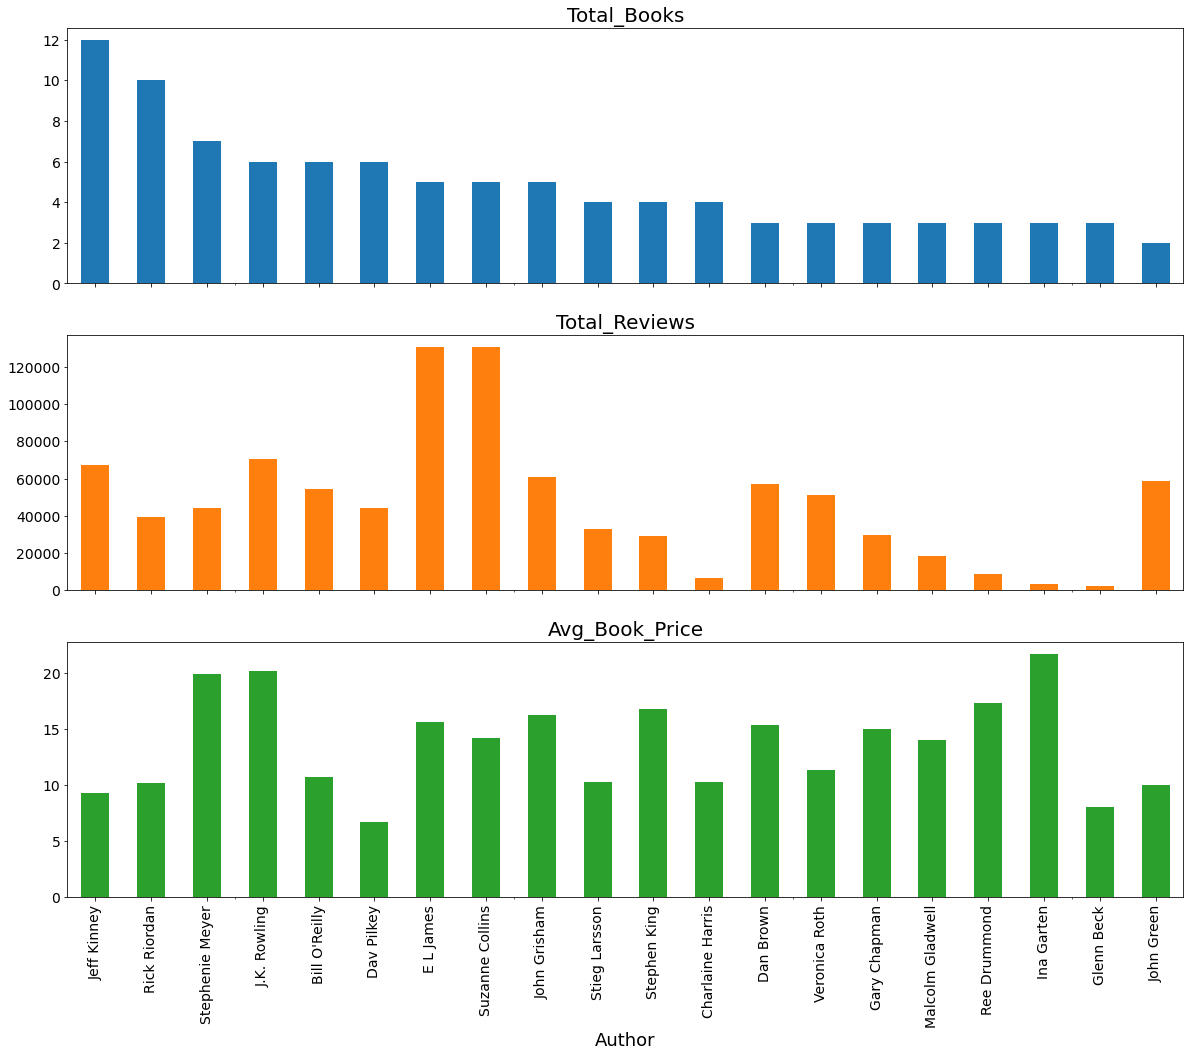

In [21]:
axes = author.head(20).plot.bar(x='Author', subplots=True, figsize=(20,16), fontsize=14, legend=False)
for ax in axes:
    ax.set_title(ax.get_title())
axes[-1].set_xlabel(axes[-1].get_xlabel(), fontsize=18)
plt.show()

## Rating Analysis

### Finding out the distribution of rating

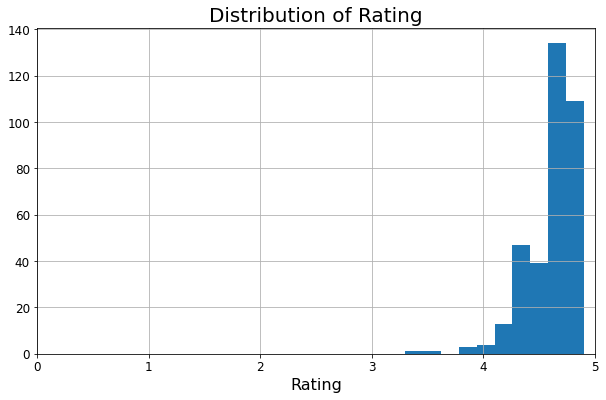

In [22]:
# Total count for each Rating and show it as dataframe
# Unique books data
rating_hist = df_unique['User Rating'].hist(bins=10, figsize=(10,6))
rating_hist.set_title('Distribution of Rating')
rating_hist.set_xlabel('Rating')
rating_hist.set_xlim(0, 5)
plt.show()

### Finding out the distribution of user rating based on number of years books listed as best seller

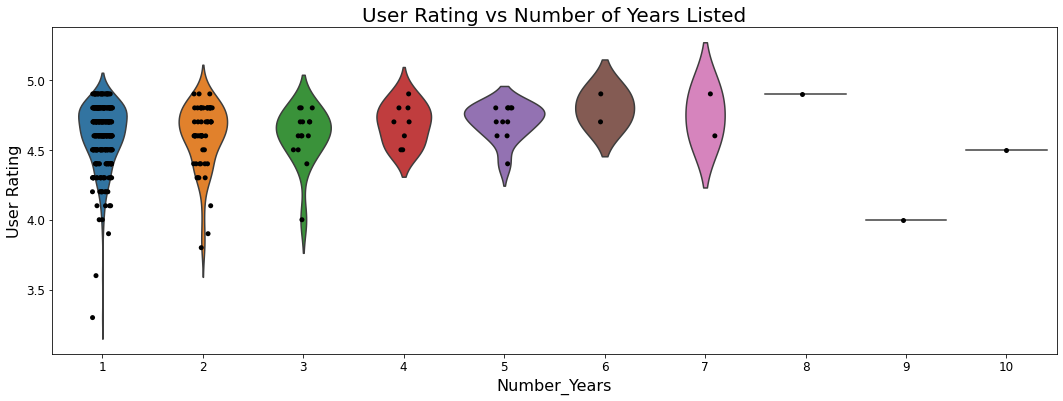

In [23]:
fig, ax1 = plt.subplots(figsize=(18,6))
sns.violinplot(x='Number_Years', y='User Rating', data=df_unique, ax=ax1, inner=None)
sns.stripplot(x='Number_Years', y='User Rating', data=df_unique, ax=ax1, color='k')
ax1.set_title('User Rating vs Number of Years Listed')
plt.show()

## Review Analysis

### Performing similar analysis as Rating

### Finding out the distribution of Reviews

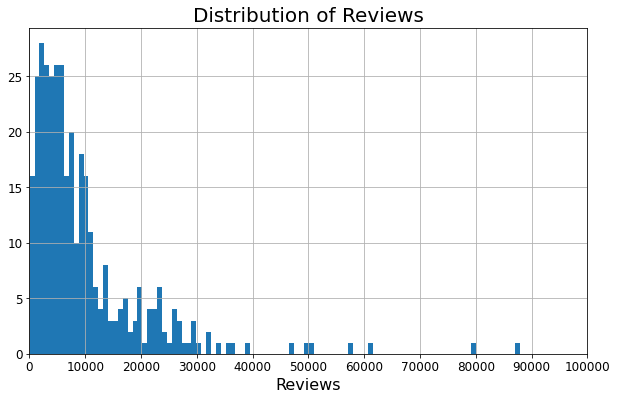

In [24]:
# Unique books data
review_hist = df_unique['Reviews'].hist(bins=100, figsize=(10,6))
review_hist.set_title('Distribution of Reviews')
review_hist.set_xlabel('Reviews')
review_hist.set_xlim(0,100000)
major_ticks = np.arange(0, 100001, 10000)
review_hist.set_xticks(major_ticks)
plt.show()

### Finding out the distribution of reviews based on number of years books listed as best seller

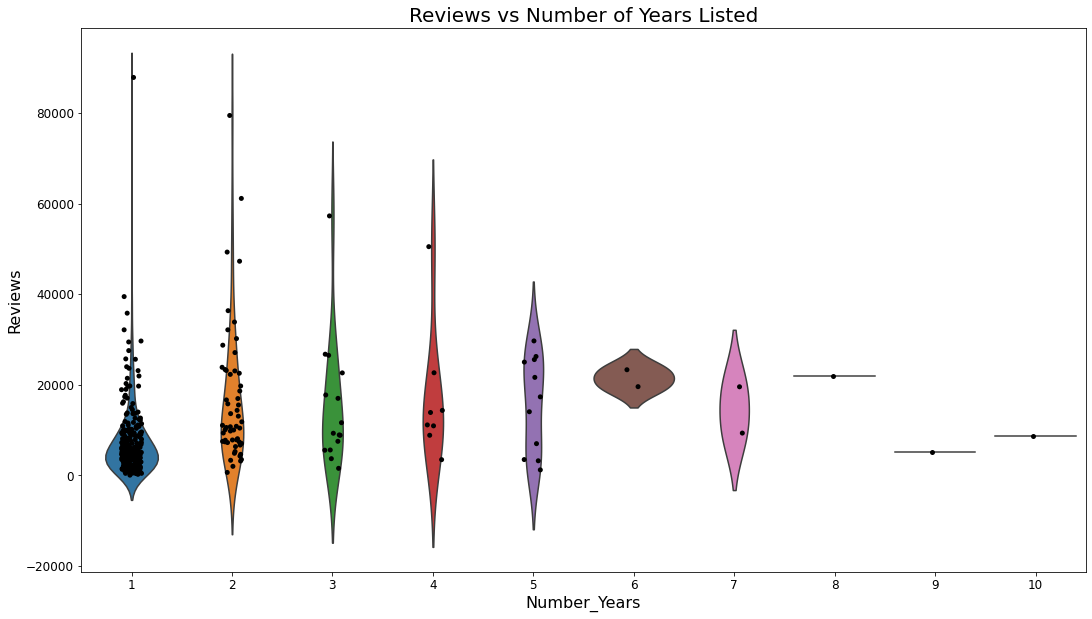

In [25]:
fig, ax1 = plt.subplots(figsize=(18,10))
sns.violinplot(x='Number_Years', y='Reviews', data=df_unique, ax=ax1, inner=None)
sns.stripplot(x='Number_Years', y='Reviews', data=df_unique, ax=ax1, color='k')
ax1.set_title('Reviews vs Number of Years Listed')
plt.show()

## Price Analysis

### Finding out the distribution of Price

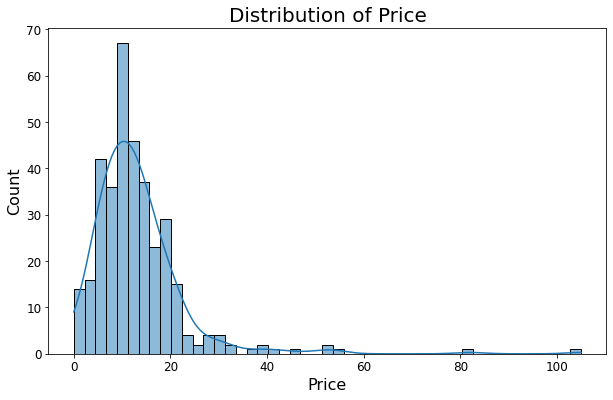

In [26]:
# Creating histogram using seaborn including kernel density estimate
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_unique, x='Price', ax = ax1, kde=True)
ax1.set_title('Distribution of Price', fontsize=20)
plt.show()

Here, most book has price lower than 40. There are few expensive books

### Lets find all the expensive books

In [27]:
# Finding out books with price higher than 40
df_unique[(df_unique['Price']>40)].sort_values(by='Price', ascending=False).reset_index(drop=True)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Number_Years
0,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,2
1,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction,1
2,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction,1
3,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction,1
4,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,1
5,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,10
6,Watchmen,Alan Moore,4.8,3829,42,2009,Fiction,1


## Year Analysis

### Finding out total number of best selling books each year

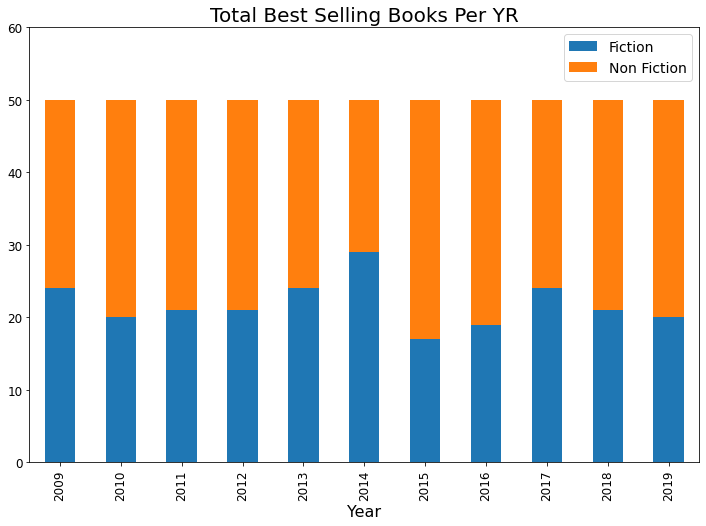

In [28]:
df_year = df.groupby(['Year', 'Genre'])['Name'].count().unstack().fillna(0)
fig, ax1 = plt.subplots(figsize=(12, 8))
df_year.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Total Best Selling Books Per YR')
ax1.set_ylim(0, 60)
ax1.legend(loc='best')
plt.show()